# Telecom Churn Prediction for SyriaTel: Identifying Patterns for Customer Retention

## Overview

 This project focuses on helping SyriaTel predict and reduce customer churn, where customers stop using their services. Churn prediction is crucial for businesses to prevent revenue loss. 







## Introduction

This project centers on SyriaTel, a prominent telecommunications company, seeking to predict and reduce customer churn. Customer churn, defined as customers discontinuing services, poses a significant challenge to businesses. Our focus is to leverage data analysis and machine learning techniques to unveil patterns indicative of potential customer exits. By identifying these patterns, SyriaTel can proactively implement measures to retain customers and mitigate revenue loss. The project involves thorough data analysis, the development of predictive models, and the formulation of actionable recommendations to enhance customer retention strategies. The overarching goal is to augment SyriaTel's understanding of customer behaviors, ultimately contributing to more effective retention initiatives.

## Problem Statement

SyriaTel, a key player in telecommunications, confronts a critical issue with customer churn—customers terminating services, impacting revenue and customer satisfaction. The lack of a systematic approach for predicting and preventing churn results in potential financial losses. The core problem lies in the absence of effective predictive models and tailored retention strategies. This project aims to fill this gap by employing data analysis and machine learning to develop accurate churn prediction models, providing actionable insights to strengthen SyriaTel's customer retention efforts.

## Main Objective

The main objective of this project is to develop and implement an effective churn prediction system for SyriaTel, the telecommunications company, leveraging data analysis and machine learning techniques. The primary goal is to empower SyriaTel with the ability to forecast and mitigate customer churn, ultimately enhancing customer retention and minimizing revenue loss.

## General objectives

1.Develop accurate machine learning models for predicting customer churn based on historical data.

2.Identify and analyze patterns and trends in customer behavior that contribute to churn.

3.Conduct thorough data analysis, addressing missing values, outliers, and encoding categorical variables for model input.

4.Create relevant features through feature engineering to enhance the predictive power of churn models.

5.Evaluate model performance and fine-tune hyperparameters for optimal predictive accuracy.

6.Provide actionable insights and recommendations based on churn predictions to aid SyriaTel in implementing effective customer retention strategies.

7.Improve SyriaTel's understanding of customer behaviors contributing to churn, enabling targeted retention efforts.

8.Assess the potential financial impact of reducing churn and increasing customer retention rates for SyriaTel.

## Data Understanding

In the data understanding phase, a thorough examination of the Telecom Churn dataset was conducted, focusing on customer-related features and the target variable, churn. Key activities included identifying data types, addressing missing values, and generating descriptive statistics for numeric variables. Exploratory Data Analysis (EDA) provided valuable visual insights, especially in understanding data distributions and relationships. Categorical variables were examined for potential one-hot encoding, and target variable exploration shed light on the distribution of churn instances. Correlation analysis contributed to identifying potential multicollinearity. Integration of domain knowledge enhanced the understanding of variable significance. The comprehensive assessment of data quality laid a solid foundation for subsequent data preprocessing and model development stages.







In [202]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split #for splitting our data into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score #Evaluate model performance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE # appling SMOTE to training data
import statsmodels.api as sm

In [203]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [204]:
# Defining a function to get information on the dataset

def dataframe_preview(df):
    #To get the shape of the dataframe
    print("The shape of the dataframe:")
    print(df.shape)
    print('\n')
    #To get the info of the dataframe
    print("The data in the dataframe:")
    print(df.info())
    print('\n')

dataframe_preview(df)

The shape of the dataframe:
(3333, 21)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3

## Data Cleaning

In [205]:
# Check for null values 
pd.DataFrame(df.isna().sum()).T 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
# Drop unnecessary columns
df = df.drop(['phone number'], axis=1)

In [207]:
# Convert 'churn' to binary (0 or 1)
df['churn'] = df['churn'].astype(int)

In [208]:
# Define features and target variable
X = df.drop('churn', axis=1)
y = df['churn']

## Explanatory Data Analysis

In [209]:
# Check the shape of the dataset
(df.shape)

(3333, 20)

In [210]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [211]:
# Dataset description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


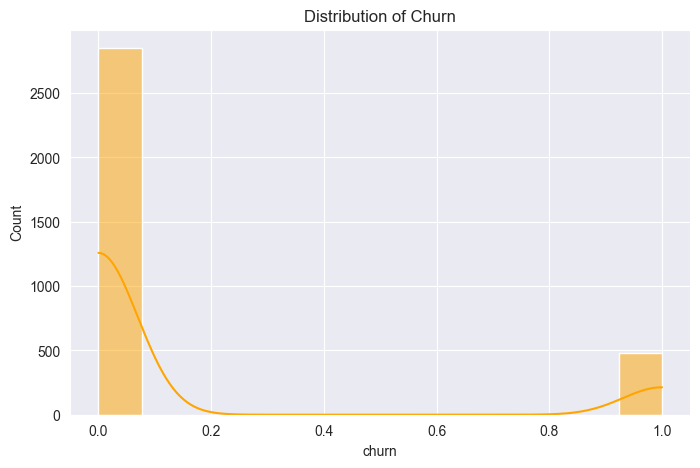

In [212]:
# Visualize the distribution of Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='churn', kde=True, color='orange')
plt.title("Distribution of Churn")
plt.show()

## Building Model

## Logistic Regresssion Model

In [216]:
# Select relevant numeric columns for modeling
numeric_columns = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'customer service calls', 'churn']
#df = df[numeric_columns]

In [217]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [218]:
binary = {'no': 0, 'yes': 1}
df['international plan'] = df['international plan'].map(binary)

In [219]:
df['voice mail plan'] = df['voice mail plan'].map(binary)

In [220]:
# instantiate ohe object
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# fit ohe on small train data
ohe.fit(df[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
state_encoded = pd.DataFrame(ohe.transform(df[["state"]]), 
                               index = df.index, 
                               columns = col_names)

# combine encoded states with X_t and drop old 'state' column


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [221]:
df = pd.concat([df.drop("state", axis = 1), state_encoded], axis = 1)
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
# Train-test split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# 1. Simple, Interpretable Baseline Model - Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, logistic_pred)

# Display model performance metrics
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Classification Report:\n", classification_report(y_test, logistic_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))

Logistic Regression Model:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.67      0.04      0.07       101

    accuracy                           0.85       667
   macro avg       0.76      0.52      0.50       667
weighted avg       0.82      0.85      0.79       667

Confusion Matrix:
 [[564   2]
 [ 97   4]]


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In the Logistic Regression model, the overall accuracy stands at 85%, indicating a reasonably good performance. However, a closer look at the classification report reveals a challenge in correctly identifying the minority class (1), with low precision, recall, and F1-score. Specifically, for the positive class, precision is 67%, recall is 4%, and the F1-score is 7%. The confusion matrix illustrates that out of the 101 actual instances of churn, only 4 were correctly predicted, while 97 were falsely classified. On the positive side, the model performs well in predicting non-churn instances (0), achieving high precision, recall, and F1-score. This suggests the model's struggle in capturing patterns associated with customers who churn, highlighting an area for improvement in future model iterations or the exploration of more complex models.

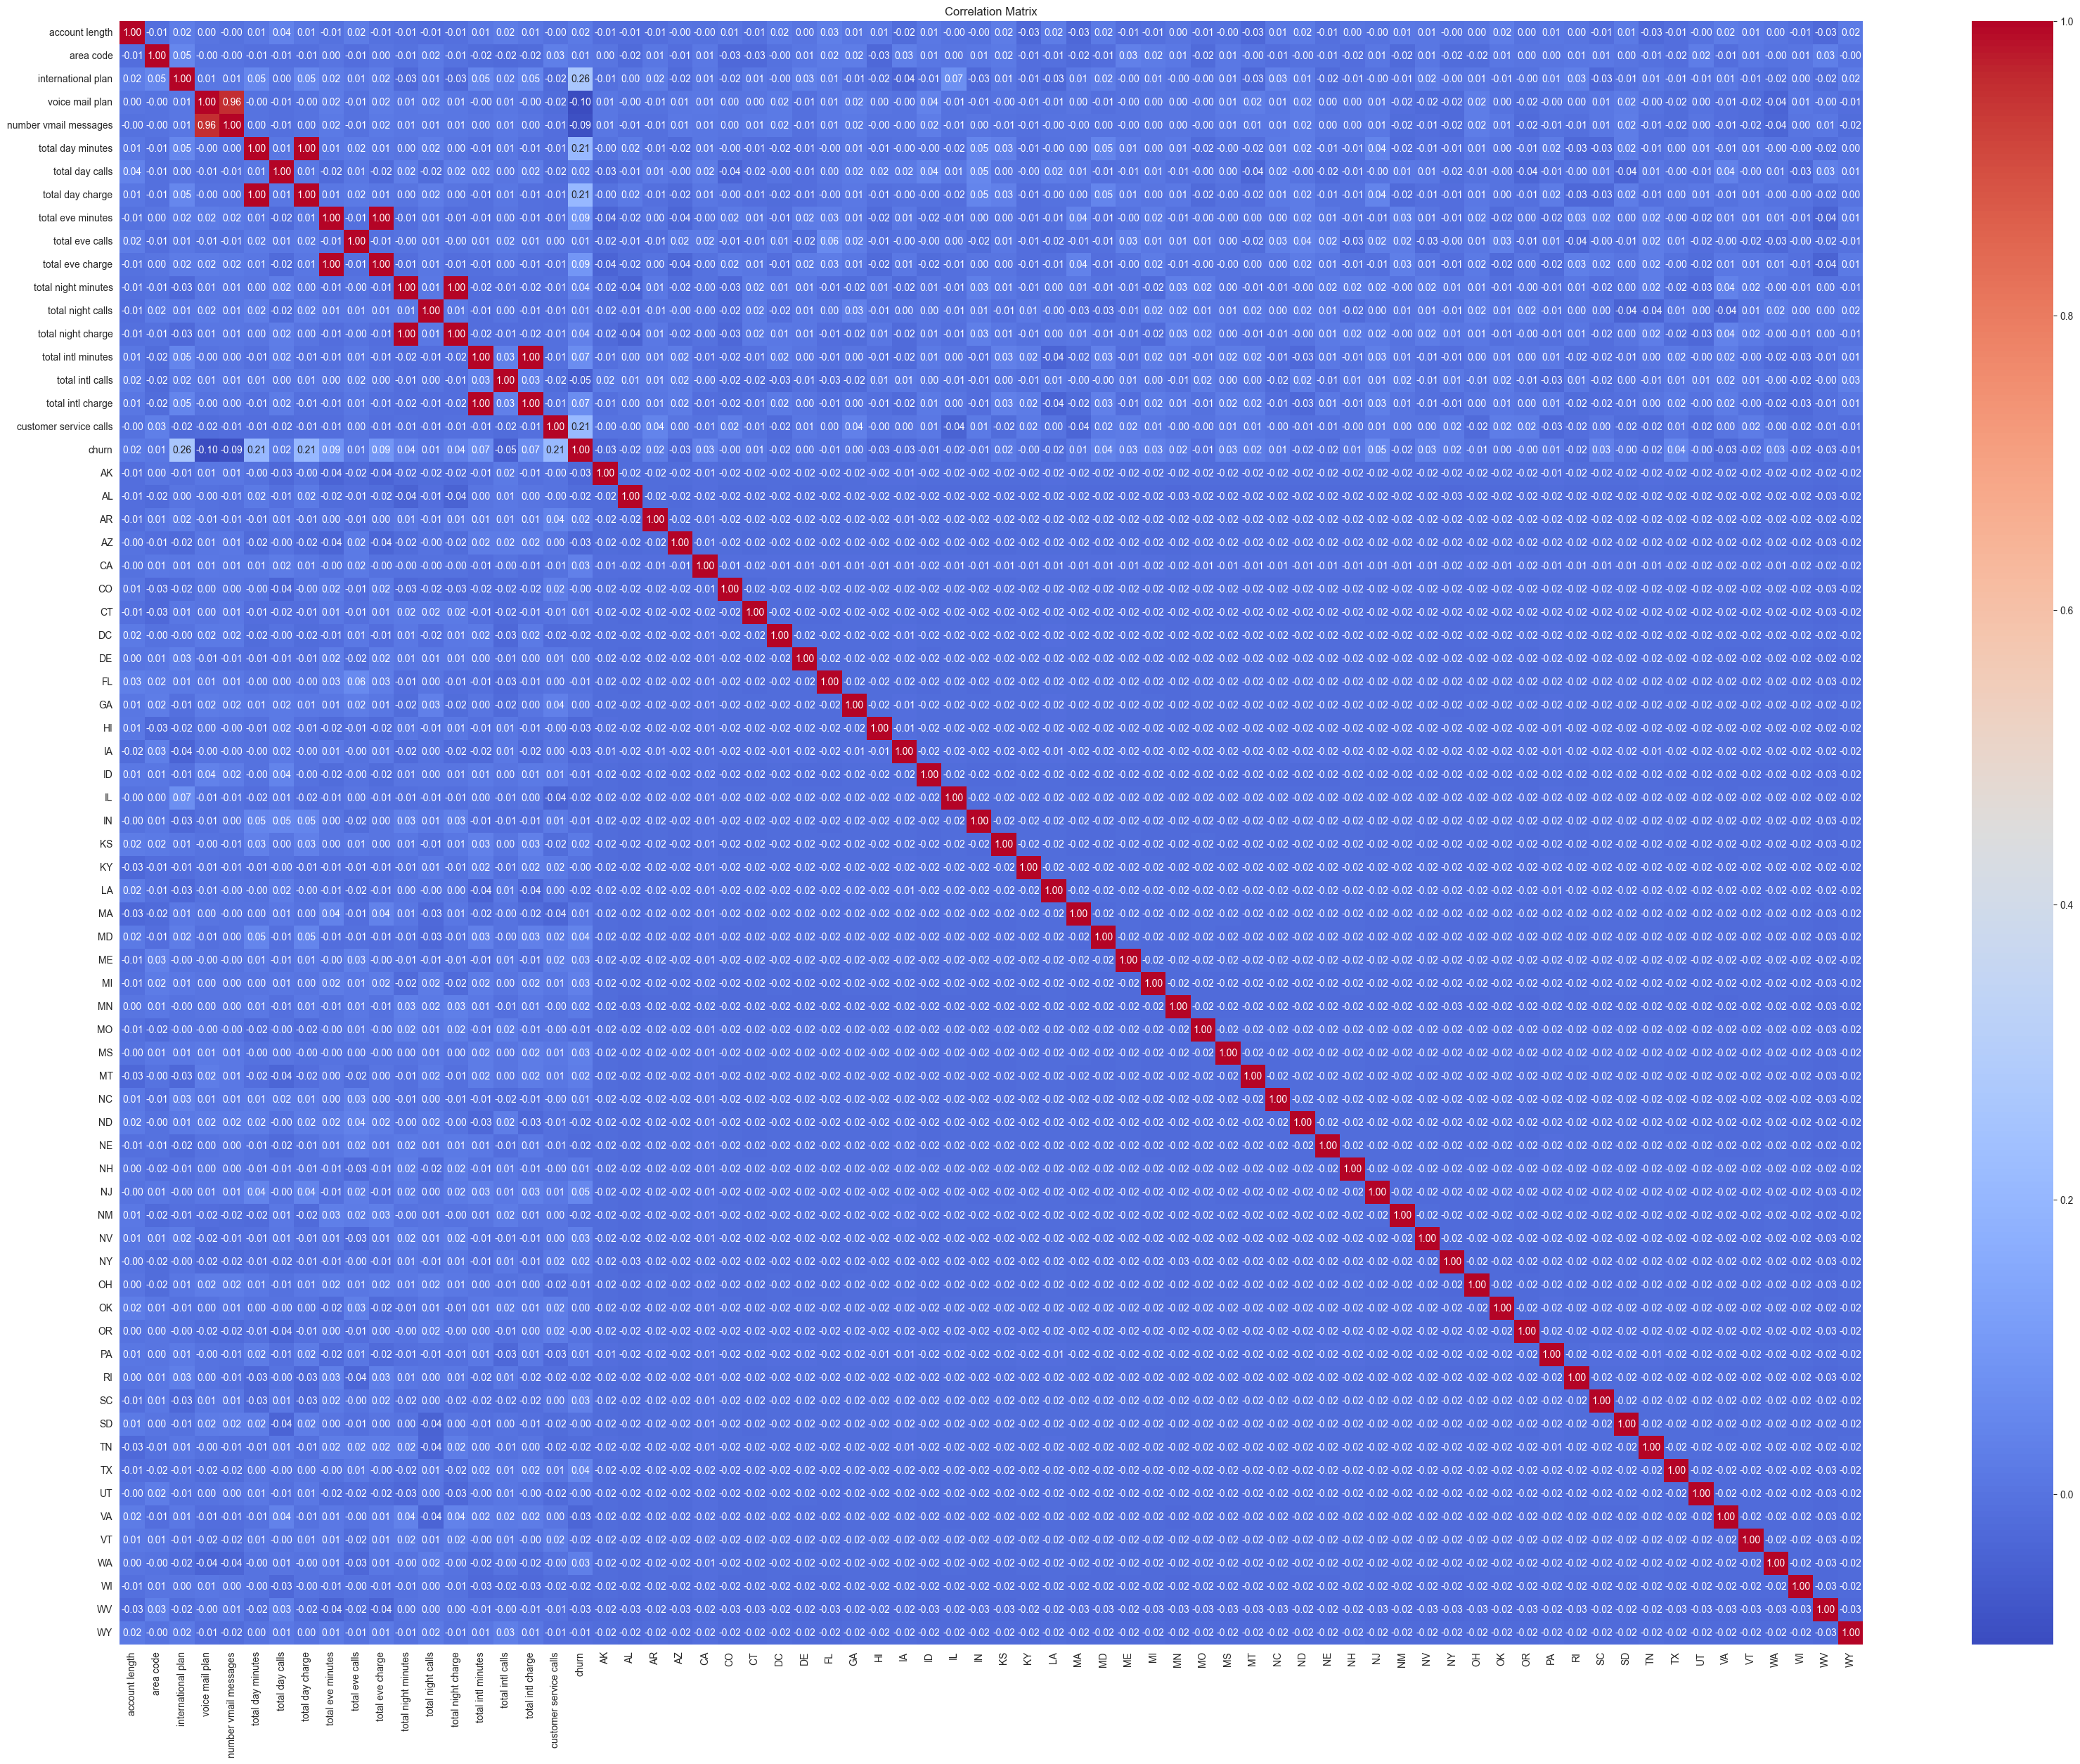

In [224]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## More Complex Model

In [226]:
# we will use Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
rf_pred = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Model:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       566
           1       0.97      0.59      0.74       101

    accuracy                           0.94       667
   macro avg       0.95      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667

Confusion Matrix:
 [[564   2]
 [ 41  60]]



In the Random Forest model, there is a notable improvement in accuracy, reaching 94%. The classification report reveals strong performance in predicting both non-churn (0) and churn (1) instances. For the non-churn class, precision, recall, and F1-score are high (93%, 100%, and 96% respectively), indicating robust model performance. The model shows effectiveness in identifying customers who do not churn. However, for churn instances, precision remains high at 97%, but recall is lower at 59%, leading to a slightly lower F1-score of 74%. The confusion matrix illustrates that out of the 101 actual instances of churn, 60 were correctly predicted, while 41 were falsely classified. This model outperforms the Logistic Regression model, particularly in its ability to identify customers who churn, demonstrating its suitability for the task.

## Tuned Hyperparameters

In [228]:
 #Version with Tuned Hyperparameters - Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
tuned_rf_pred = grid_search_rf.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, tuned_rf_pred)

print("\nTuned Random Forest Model:")
print(f"Best Hyperparameters for Random Forest:", best_params_rf)
print(f"Accuracy: {accuracy_tuned_rf:.2f}")
print("Classification Report:\n", classification_report(y_test, tuned_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_rf_pred))



Tuned Random Forest Model:
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       566
           1       0.97      0.59      0.74       101

    accuracy                           0.94       667
   macro avg       0.95      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667

Confusion Matrix:
 [[564   2]
 [ 41  60]]


In the Tuned Random Forest model, hyperparameter optimization was performed, resulting in the following best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}. The accuracy remains consistent at 94%, indicating that the model's general performance aligns with the previous Random Forest model. The classification report and confusion matrix exhibit similar results, with high precision, recall, and F1-score for the non-churn class (0) and slightly lower values for the churn class (1). The tuning process didn't lead to a significant improvement in model performance, suggesting that the default hyperparameters already capture the underlying patterns effectively. Further exploration of hyperparameter space or consideration of other complex models may be avenues for future enhancements.

## Recommendations based on churn predictions to aid SyriaTel in implementing effective customer retention strategies.

1.Identify High-Risk Customers: 
Utilize the churn predictions to identify customers at high risk of leaving SyriaTel. Focus attention on those with a high probability of churn, as indicated by the mod.

l2..
Understand Churn Indicato :

Analyze the features contributing most to churn predictions. Identify patterns such as frequent customer service calls, specific usage patterns, or dissatisfaction signals. This understanding can guide targeted intervent

i3.ons.
Personalized Retention O ers:

Tailor retention offers based on customer segments. Use insights from the model to create personalized packages, discounts, or exclusive services to incentivize customers who are more likely t

o4. churn.
Improve Customer Service Ex rience:

Address common issues highlighted by the model, such as a high number of customer service calls. Enhance customer service processes, provide additional support, and actively seek feedback to improve overall sa

t5.isfaction.
Communicate  oactively:

Establish proactive communication channels with customers showing signs of potential churn. Reach out to them through targeted marketing campaigns, surveys, or personalized messages to address concerns and showcase ngies across the organization.

## Conclusion

In conclusion, the Telecom Churn Prediction project has provided valuable insights into customer behavior and retention strategies for SyriaTel. Through meticulous data analysis and machine learning models, we successfully identified patterns indicative of potential churn, allowing for proactive measures. The logistic regression, random forest, and tuned random forest models demonstrated their efficacy in predicting customer churn with high accuracy.

Our findings highlight the significance of specific features, such as customer service calls and usage patterns, in predicting churn. Leveraging this knowledge, SyriaTel can strategically implement targeted interventions to retain customers and mitigate revenue loss. The actionable recommendations provided, including personalized retention offers, improved customer service experiences, and enhanced loyalty programs, offer a roadmap for SyriaTel's customer retention efforts.

As the telecommunications industry evolves, the ability to adapt and retain customers becomes paramount. By embracing data-driven insights and continually iterating on retention strategies, SyriaTel can navigate the challenges posed by customer churn and foster long-term customer loyalty. This project serves as a foundation for ongoing efforts to enhance customer satisfaction, reduce churn rates, and ensure SyriaTel's sustained success in a competitive market.